In [1]:
import numpy as np
import gpflow
 
import matplotlib.pyplot as plt
import plot_params
plt.rcParams.update(plot_params.fig_kernel_ex) 

np.random.seed(1) 

class Interpolant():
    
    def __init__(self, kernel, X, Y):
        
        self.kernel = kernel
        self.jitter = 1e-8
        self.N = X.shape[0]
        self.centers = X
        self.weights = np.linalg.solve(self.kernel(X,X) + self.jitter*np.eye(self.N,self.N),Y)
    
    def __call__(self, x):
        
        fx = np.zeros(x.shape)
        for i in range(self.N):
            fx = fx + np.array(self.weights[i]*self.kernel(self.centers[i].reshape(-1,1),x)).reshape(-1,1)
        return fx
    
    def norm(self):
        
        return np.sqrt(self.weights.T @ self.kernel(self.centers,self.centers) @ self.weights)[0][0]
    
    def _power(self, x):
        
        Kxx = np.diag(self.kernel(x,x))
        KxX = self.kernel(x,self.centers)
        KXx = self.kernel(self.centers,x)
        KXX = self.kernel(self.centers,self.centers) + self.jitter*np.eye(self.centers.shape[0],self.centers.shape[0])
        
        return np.sqrt( Kxx - np.diag( KxX @ np.linalg.solve(KXX,KXx) ))
    
    def bounds(self, x, norm_f):
            
        return (self._power(x) * np.sqrt(norm_f**2 - self.norm()**2)).reshape(-1,1)

2022-12-05 10:42:00.992661: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/emilio/Documents/GitHub/phd-thesis/scripts/python/venv/lib/python3.8/site-packages/gpflow/experimental/utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.decorator.check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(
/Users/emilio/Documents/GitHub/phd-thesis/scripts/python/venv/lib/python3.8/site-packages/gpflow/experimental/utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.inheritance.inherit_check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


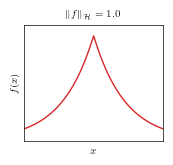

In [7]:
xmin, xmax = -2, 2
xx = np.linspace(xmin * 1.15, xmax * 1.15, 1000).reshape(-1, 1) 

X = np.array([0.]).reshape(-1,1)
Y = np.array([1.]).reshape(-1,1)
k = gpflow.kernels.Matern12()
s = Interpolant(k, X, Y)

fig = plt.figure()
plt.title("".join(["$\Vert f \Vert_\mathcal{H} = \;$", str(round(s.norm(),2))]))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.03, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.05)
plt.plot(xx.reshape(-1), s(xx).reshape(-1) , color=plot_params.colors["red"])
plt.xlim(xmin*1.1,xmax*1.1)
plt.ylim(0,1.1)
plt.xticks([])
plt.yticks([])

filename = 'chap2_rkhs_member_1'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".svg"]), bbox_inches='tight', pad_inches = 0.02)

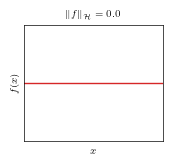

In [8]:
xmin, xmax = -2, 2
xx = np.linspace(xmin * 1.15, xmax * 1.15, 1000).reshape(-1, 1) 

X = np.array([0.]).reshape(-1,1)
Y = np.array([0.]).reshape(-1,1)
k = gpflow.kernels.Matern12()
s = Interpolant(k, X, Y)

fig = plt.figure()
plt.title("".join(["$\Vert f \Vert_\mathcal{H} = \;$", str(round(s.norm(),2))]))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.03, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.05)
plt.plot(xx.reshape(-1), s(xx).reshape(-1) , color=plot_params.colors["red"])
plt.xlim(xmin*1.1,xmax*1.1)
plt.ylim(-1,1)
plt.xticks([])
plt.yticks([])

filename = 'chap2_rkhs_member_2'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".svg"]), bbox_inches='tight', pad_inches = 0.02)

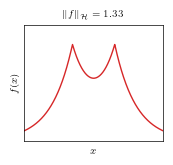

In [12]:
xmin, xmax = -3, 3
xx = np.linspace(xmin * 1.15, xmax * 1.15, 1000).reshape(-1, 1) 

X = np.array([-1., 1.]).reshape(-1,1)
Y = np.array([1., 1.]).reshape(-1,1)
k = gpflow.kernels.Matern12()
s = Interpolant(k, X, Y)

fig = plt.figure()
plt.title("".join(["$\Vert f \Vert_\mathcal{H} = \;$", str(round(s.norm(),2))]))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.03, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.05)
plt.plot(xx.reshape(-1), s(xx).reshape(-1) , color=plot_params.colors["red"])
plt.xlim(xmin*1.1,xmax*1.1)
plt.ylim(-0,1.2)
plt.xticks([])
plt.yticks([])

filename = 'chap2_rkhs_member_3'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".svg"]), bbox_inches='tight', pad_inches = 0.02)

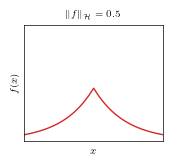

In [13]:
xmin, xmax = -2, 2
xx = np.linspace(xmin * 1.15, xmax * 1.15, 1000).reshape(-1, 1) 

X = np.array([0.]).reshape(-1,1)
Y = np.array([.5]).reshape(-1,1)
k = gpflow.kernels.Matern12()
s = Interpolant(k, X, Y)

fig = plt.figure()
plt.title("".join(["$\Vert f \Vert_\mathcal{H} = \;$", str(round(s.norm(),2))]))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.03, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.05)
plt.plot(xx.reshape(-1), s(xx).reshape(-1) , color=plot_params.colors["red"])
plt.xlim(xmin*1.1,xmax*1.1)
plt.ylim(0,1.1)
plt.xticks([])
plt.yticks([])

filename = 'chap2_rkhs_member_4'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".svg"]), bbox_inches='tight', pad_inches = 0.02)

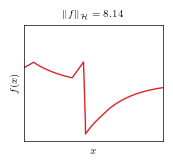

In [85]:
np.random.seed(2) 

xmin, xmax = -2, 2
xx = np.linspace(xmin * 1.15, xmax * 1.15, 1000).reshape(-1, 1) 

N = 6
ymin, ymax = -3, 3
X = np.random.uniform(xmin, xmax, (N, 1)).reshape(-1,1)
Y = np.random.uniform(ymin, ymax, (N, 1)).reshape(-1,1)
k = gpflow.kernels.Matern12()
s = Interpolant(k, X, Y)

fig = plt.figure()
plt.title("".join(["$\Vert f \Vert_\mathcal{H} = \;$", str(round(s.norm(),2))]))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.03, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.05)
plt.plot(xx.reshape(-1), s(xx).reshape(-1) , color=plot_params.colors["red"])
plt.xlim(xmin*1.1,xmax*1.1)
plt.ylim(-2,2)
plt.xticks([])
plt.yticks([])

filename = 'chap2_rkhs_member_5'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".svg"]), bbox_inches='tight', pad_inches = 0.02)

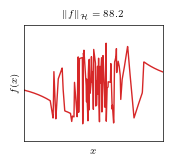

In [86]:
np.random.seed(10) 

xmin, xmax = -2, 2
xx = np.linspace(xmin*1.5, xmax*1.5, 1000).reshape(-1, 1) 

N = 100
ymin, ymax = -1.5, 1.5

#X = np.random.uniform(xmin, xmax, (N, 1)).reshape(-1,1)
X = np.random.normal(0, 0.7, (N, 1)).reshape(-1,1)

Y = np.random.uniform(ymin, ymax, (N, 1)).reshape(-1,1)
#Y = np.random.normal(0.1, 0.5, (N, 1)).reshape(-1,1)

k = gpflow.kernels.Matern12()
s = Interpolant(k, X, Y)

fig = plt.figure()
plt.title("".join(["$\Vert f \Vert_\mathcal{H} = \;$", str(round(s.norm(),2))]))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.03, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.05)
plt.plot(xx.reshape(-1), s(xx).reshape(-1) , color=plot_params.colors["red"])
plt.xlim(xmin*1.2,xmax*1.2)
plt.ylim(-2,2)
plt.xticks([])
plt.yticks([])

filename = 'chap2_rkhs_member_6'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".svg"]), bbox_inches='tight', pad_inches = 0.02)

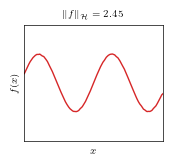

In [88]:
np.random.seed(10) 

xmin, xmax = -6, 6
xx = np.linspace(xmin*1.2, xmax*1.2, 1000).reshape(-1, 1) 

N = 100
ymin, ymax = -1.5, 1.5

X = np.random.uniform(xmin, xmax, (N, 1)).reshape(-1,1)
Y = np.sin(X).reshape(-1,1)
#Y = np.random.normal(0.1, 0.5, (N, 1)).reshape(-1,1)

k = gpflow.kernels.Matern12()
s = Interpolant(k, X, Y)

fig = plt.figure()
plt.title("".join(["$\Vert f \Vert_\mathcal{H} = \;$", str(round(s.norm(),2))]))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.03, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.05)
plt.plot(xx.reshape(-1), s(xx).reshape(-1) , color=plot_params.colors["red"])
plt.xlim(xmin,xmax)
plt.ylim(-2,2)
plt.xticks([])
plt.yticks([])

filename = 'chap2_rkhs_member_7'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".svg"]), bbox_inches='tight', pad_inches = 0.02)

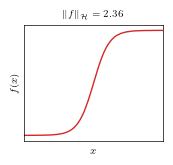

In [114]:
np.random.seed(10) 

xmin, xmax = -5, 5
xx = np.linspace(xmin*1.5, xmax*1.5, 1000).reshape(-1, 1) 

N = 300
ymin, ymax = -1.5, 1.5

X = np.random.uniform(xmin, xmax, (N, 1)).reshape(-1,1)
Y = np.heaviside(X, 100).reshape(-1,1)
Y = np.absolute(X).reshape(-1,1)
Y = np.tanh(X).reshape(-1,1)

k = gpflow.kernels.Matern12()
s = Interpolant(k, X, Y)

fig = plt.figure()
plt.title("".join(["$\Vert f \Vert_\mathcal{H} = \;$", str(round(s.norm(),2))]))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.03, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.05)
plt.plot(xx.reshape(-1), s(xx).reshape(-1) , color=plot_params.colors["red"])
plt.xlim(xmin*.9,xmax*.9)
plt.xticks([])
plt.yticks([])

filename = 'chap2_rkhs_member_8'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".svg"]), bbox_inches='tight', pad_inches = 0.02)

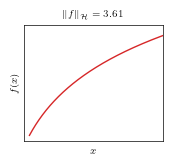

In [110]:
np.random.seed(10) 

xmin, xmax = -6, 6
xx = np.linspace(xmin*1.2, xmax*1.2, 1000).reshape(-1, 1) 

N = 300
ymin, ymax = -1.5, 1.5

X = np.random.uniform(xmin, xmax, (N, 1)).reshape(-1,1)
Y = np.heaviside(X, 100).reshape(-1,1)
Y = np.absolute(X).reshape(-1,1)
Y = np.tanh(X).reshape(-1,1)

k = gpflow.kernels.SquaredExponential()
s = Interpolant(k, X, Y)

fig = plt.figure()
plt.title("".join(["$\Vert f \Vert_\mathcal{H} = \;$", str(round(s.norm(),2))]))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.03, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.05)
plt.plot(xx.reshape(-1), s(xx).reshape(-1) , color=plot_params.colors["red"])
plt.xlim(xmin,xmax)
#plt.ylim(-2,2)
plt.xticks([])
plt.yticks([])

filename = 'chap2_rkhs_member_8'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".svg"]), bbox_inches='tight', pad_inches = 0.02)a